# MEMBACA DATASET HASIL CRAWLING KEYWORD PANAS

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
path = 'I:\data_analyst\Data Crawler\Data x 1\data_panas_bumi.csv'
data = pd.read_csv(path,sep=';')
data.sample(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
142,Wed Feb 28 23:10:06 +0000 2024,"1,76298E+18",@bellheree Maooooo,0,0,0,0,und,"1,07942E+18","1,76288E+18",eskopimelepuh,https://twitter.com/eskopimelepuh/status/17629...
433,Wed Feb 28 20:24:56 +0000 2024,"1,76294E+18",@Hioghak 🔷:Deberé preguntarte a tu novio enton...,0,1,0,1,es,"1,67052E+18","1,76284E+18",spider27511,https://twitter.com/spider27511/status/1762936...
383,Wed Feb 28 21:02:11 +0000 2024,"1,76295E+18",@thabruh3 -describir perfectamente la escena d...,0,1,0,0,es,"1,67052E+18","1,76284E+18",spider27511,https://twitter.com/spider27511/status/1762946...
342,Wed Feb 28 21:27:51 +0000 2024,"1,76295E+18",@RociLucy Es que me imagino que en ese caso as...,0,1,0,0,es,38985193,"1,76285E+18",BettCovenant,https://twitter.com/BettCovenant/status/176295...
294,Wed Feb 28 21:57:46 +0000 2024,"1,76296E+18","@ambulaninuninu @partaimedsos45 Ngaklah , itu ...",0,1,0,1,in,3269972408,"1,76276E+18",muhtauf09,https://twitter.com/muhtauf09/status/176296030...


# CEK INFORMASI DATASET

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           445 non-null    object
 1   id_str               445 non-null    object
 2   full_text            445 non-null    object
 3   quote_count          445 non-null    int64 
 4   reply_count          445 non-null    int64 
 5   retweet_count        445 non-null    int64 
 6   favorite_count       445 non-null    int64 
 7   lang                 445 non-null    object
 8   user_id_str          445 non-null    object
 9   conversation_id_str  445 non-null    object
 10  username             445 non-null    object
 11  tweet_url            445 non-null    object
dtypes: int64(4), object(8)
memory usage: 41.8+ KB


# STATISTIK DATASET

In [4]:
# buat variable dtype category
cat = ['created_at','id_str','full_text','lang','user_id_str','conversation_id_str','username','tweet_url']

In [5]:
data.describe()

,quote_count,reply_count,retweet_count,favorite_count
count,445.000000,445.000000,445.000000,445.000000
mean,0.244944,0.937079,1.226966,11.112360
std,2.767370,5.016243,12.873963,124.075921
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000
max,47.000000,81.000000,233.000000,2389.000000


In [6]:
data[cat].describe()

,created_at,id_str,full_text,lang,user_id_str,conversation_id_str,username,tweet_url
count,445,445,445,445,445,445,445,445
unique,437,6,445,13,389,53,391,445
top,Wed Feb 28 22:57:12 +0000 2024,"1,76298E+18",Hisoka,in,"1,67052E+18","1,76298E+18",spider27511,https://twitter.com/Beberuruang/status/1762991...
freq,2,94,1,257,21,62,21,1


# VIS ORIGINAL DATA WORLDCLOUD & FREKUENSI KATA

In [7]:
# !pip install wordcloud

In [8]:
import numpy as np
import PIL as Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt 

**wordcloud**

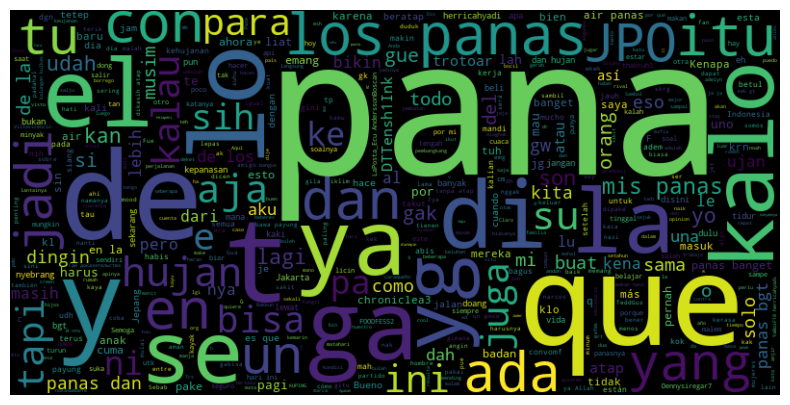

In [40]:
df = ' '.join(data['full_text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp'])

wc = WordCloud(stopwords=stopwords, background_color='black',max_words=500,width=800,height=400)
wc.generate(df)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Menghitung Frekuensi Kata**

In [10]:
from collections import Counter

TypeError: 'str' object is not a mapping

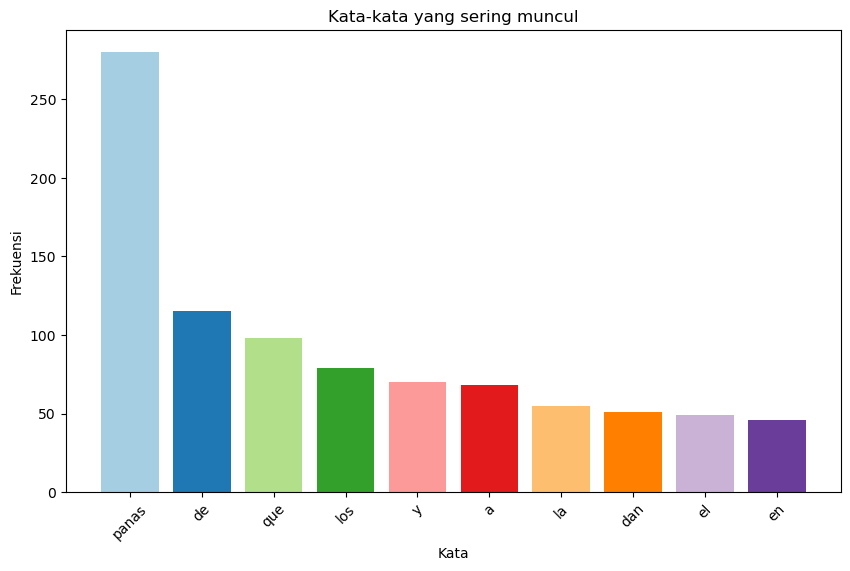

In [39]:
text = ' '.join(data['full_text'])

tokens = text.split()
word_count =Counter(tokens)

top_words = word_count.most_common(10)
word,count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10,6))
bars = plt.bar(word,count,color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata yang sering muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars,count):
    plt.text(bar.get_x(), bar.get_width() / 2 - 0.1, num+1, str(num), fontsize=12, color='black', ha='center')
    # plt.text(bar.get_x(), bar.get_width() / 2 - 0.1, num+1, fontsize=12, color='black', ha='center')

plt.show()

# PRE-PROCESSING DATA

In [70]:
df = pd.DataFrame(data[['full_text']])
df.sample(5)

,full_text
375,"@DTTensh1Ink 🕷️:Rakkun, es que casi todos en e..."
120,Ga bisa dibandingin sama negara 4 musim deh ka...
314,@PosRondaAnfield Gakpo panas liat dua bocil ny...
205,Mesti masam kalau pakai belit mcm ni dahla mal...
140,"suhu dingin berembun, uap panas berembun 😊😊😊😊😊"


**CLEANING**

In [16]:
import re
import string
import nltk

In [68]:
def remove_url(tweet):
    url = re.compile(r'https?://\s+|www\.\s+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile('['
                               u'\U0001F600-\U0001F64F'
                               u'\U0001F300-\U0001F5FF'
                               u'\U0001F680-\U0001F6FF'
                               u'\U0001F1E0-\U0001F1FF'
                               ']+', flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    tweet = re.sub(r'[0-9]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweet):
    translator = str.maketrans('','', string.punctuation)
    return tweet.translate(translator)

def remove_symbols(tweet):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

In [71]:
df['cleansing'] = df['full_text'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))

df.sample(5)

,full_text,cleansing
26,@everaithings @AnggaPutraF Tapi kalau model pe...,everaithings AnggaPutraF Tapi kalau model penu...
241,fak men kena minyak panas,fak men kena minyak panas
307,mata gue panas😞😞😞😞😞😞😞😞😞😞😞😞😞😞😞😞,mata gue panas
209,@DrRubenMejia Estoy suscrito a su canal hace m...,DrRubenMejia Estoy suscrito a su canal hace mu...
0,Hisoka,Hisoka


**CASE FOLDING AND TOKENIZATION**

**CASE FOLDING**

In [ ]:
# def case_folding(text):
#     if isinstance(text, str):
#         lowercase_text = text.lower()
#         return lowercase_text
#     else:
#         return  text
    
# df['case_folding'] = df['cleansing'].apply(case_folding)
# df.sample(5)

**TOKENIZATION**

In [ ]:
# def tokenize(text):
#     tokes = text.split()
#     return tokens

# df['tokenize'] = df['case_folding'].apply(tokenize)
# df.sample(5)

In [56]:
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding
262,@miftahihsan_ tapi kalo panas 2 spicy sih boleh,miftahihsan tapi kalo panas spicy sih boleh,"[miftahihsan, tapi, kalo, panas, spicy, sih, b..."
402,@adobubble not reallyyy tapi dah telan ubat ga...,adobubble not reallyyy tapi dah telan ubat gas...,"[adobubble, not, reallyyy, tapi, dah, telan, u..."
288,tekak cepat kering. rasa mcm demam tp x. benci...,tekak cepat kering rasa mcm demam tp x benci n...,"[tekak, cepat, kering, rasa, mcm, demam, tp, x..."
424,bangun-bangun tenggorokan sama dada kerasa panas,bangunbangun tenggorokan sama dada kerasa panas,"[bangunbangun, tenggorokan, sama, dada, kerasa..."
71,@ponakannyaom Batu bata dan genteng yang berku...,ponakannyaom Batu bata dan genteng yang berkua...,"[ponakannyaom, batu, bata, dan, genteng, yang,..."


**FILTERING ATAU STOPWORD REMOVAL**

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [58]:
df['Filtering / Stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))
# df.drop('Filtering/Stopword removal',axis=1)
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal
314,@PosRondaAnfield Gakpo panas liat dua bocil ny...,PosRondaAnfield Gakpo panas liat dua bocil nye...,"[posrondaanfield, gakpo, panas, liat, dua, boc...","[posrondaanfield, gakpo, panas, liat, bocil, n..."
191,@annyelire klo dibandingkan dengan jkt pas ak ...,annyelire klo dibandingkan dengan jkt pas ak k...,"[annyelire, klo, dibandingkan, dengan, jkt, pa...","[annyelire, klo, dibandingkan, jkt, pas, ak, j..."
326,"Un gustabo voló sobre mi, voló un auto con ras...",Un gustabo voló sobre mi voló un auto con rash...,"[un, gustabo, voló, sobre, mi, voló, un, auto,...","[un, gustabo, voló, sobre, mi, voló, un, auto,..."
23,@xxGypsophila_L Bakalan jadi topik panas selam...,xxGypsophilaL Bakalan jadi topik panas selama ...,"[xxgypsophilal, bakalan, jadi, topik, panas, s...","[xxgypsophilal, topik, panas, setahun🤣]"
272,@Yattie2023 @LordZeus2018 @TeddGus Cieee....yg...,Yattie LordZeus TeddGus Cieeeyg kan udah men...,"[yattie, lordzeus, teddgus, cieeeyg, kan, udah...","[yattie, lordzeus, teddgus, cieeeyg, udah, men..."


**STREMMING DATA**

In [33]:
# !pip install Sastrawi

  Obtaining dependency information for Sastrawi from https://files.pythonhosted.org/packages/6f/4b/bab676953da3103003730b8fcdfadbdd20f333d4add10af949dd5c51e6ed/Sastrawi-1.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/209.7 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 92.2/209.7 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 174.1/209.7 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 209.7/209.7 kB 1.4 MB/s eta 0:00:00


In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [60]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['Filtering / Stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal,stemming_data
77,@chi00png domm ku panas betul asli,chipng domm ku panas betul asli,"[chipng, domm, ku, panas, betul, asli]","[chipng, domm, ku, panas, asli]",chipng domm ku panas asli
436,Ngebales reply thread ini: Tokyo (atau Jepang ...,Ngebales reply thread ini Tokyo atau Jepang la...,"[ngebales, reply, thread, ini, tokyo, atau, je...","[ngebales, reply, thread, tokyo, jepang, on, a...",ngebales reply thread tokyo jepang on average ...
156,"Gua jg setuju trotoar dan JPO beratap, apalagi...",Gua jg setuju trotoar dan JPO beratap apalagi ...,"[gua, jg, setuju, trotoar, dan, jpo, beratap, ...","[gua, jg, setuju, trotoar, jpo, beratap, batam...",gua jg tuju trotoar jpo atap batam pohon gede ...
310,"gila rasanya pala gw pengen gw copot aja, pusi...",gila rasanya pala gw pengen gw copot aja pusin...,"[gila, rasanya, pala, gw, pengen, gw, copot, a...","[gila, pala, gw, pengen, gw, copot, aja, pusin...",gila pala gw ken gw copot aja pusing mata pana...
278,panas yo no sirvo pa trabajar ni para estudiar...,panas yo no sirvo pa trabajar ni para estudiar...,"[panas, yo, no, sirvo, pa, trabajar, ni, para,...","[panas, yo, no, sirvo, pa, trabajar, ni, estud...",panas yo no sirvo pa trabajar ni estudiar ni h...


**DROP DATA DUPLICATES**

In [63]:
df.drop_duplicates(subset='stemming_data', keep='first',inplace=True)
print(df.shape)
df.sample(5)

(445, 5)


,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal,stemming_data
241,fak men kena minyak panas,fak men kena minyak panas,"[fak, men, kena, minyak, panas]","[fak, men, kena, minyak, panas]",fak men kena minyak panas
325,gila kenapa panas bgt sih,gila kenapa panas bgt sih,"[gila, kenapa, panas, bgt, sih]","[gila, panas, bgt, sih]",gila panas bgt sih
303,@maru_kaneko Itu coklat panas🗿,marukaneko Itu coklat panas,"[marukaneko, itu, coklat, panas]","[marukaneko, coklat, panas]",marukaneko coklat panas
309,no se ustedes pero me molesta mucho los panas ...,no se ustedes pero me molesta mucho los panas ...,"[no, se, ustedes, pero, me, molesta, mucho, lo...","[no, ustedes, pero, me, molesta, mucho, los, p...",no ustedes pero me molesta mucho los panas que...
425,jajaj q cool que mis panas de la uni pongan at...,jajaj q cool que mis panas de la uni pongan at...,"[jajaj, q, cool, que, mis, panas, de, la, uni,...","[jajaj, q, cool, que, mis, panas, de, la, uni,...",jajaj q cool que mis panas de la uni pongan at...


# SAVE DATASET HASIL PRE-PROCESSING DATA

In [64]:
df.to_csv('Hasil_Preprocessing_DataPanasBumi.csv', encoding='utf8', index=False)

# VIS ORIGINAL DATA WORDCLOUD & FREKUENSI KATA

**WORDCLOUD**

In [65]:
data = pd.read_csv('Hasil_Preprocessing_DataPanasBumi.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      445 non-null    object
 1   cleansing                      445 non-null    object
 2   Tokenization and Case Folding  445 non-null    object
 3   Filtering / Stopword removal   445 non-null    object
 4   stemming_data                  445 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


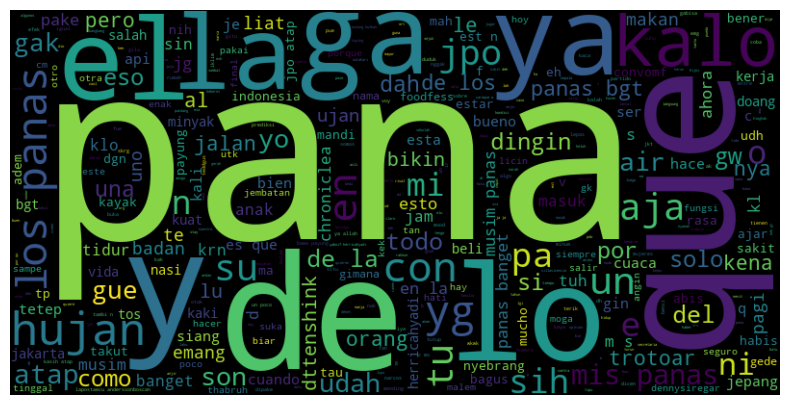

In [66]:
df = ' '.join(data['stemming_data'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp'])

wc = WordCloud(stopwords=stopwords, background_color='black',max_words=500,width=800,height=400)
wc.generate(df)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**FREKUENSI KATA**

TypeError: 'str' object is not a mapping

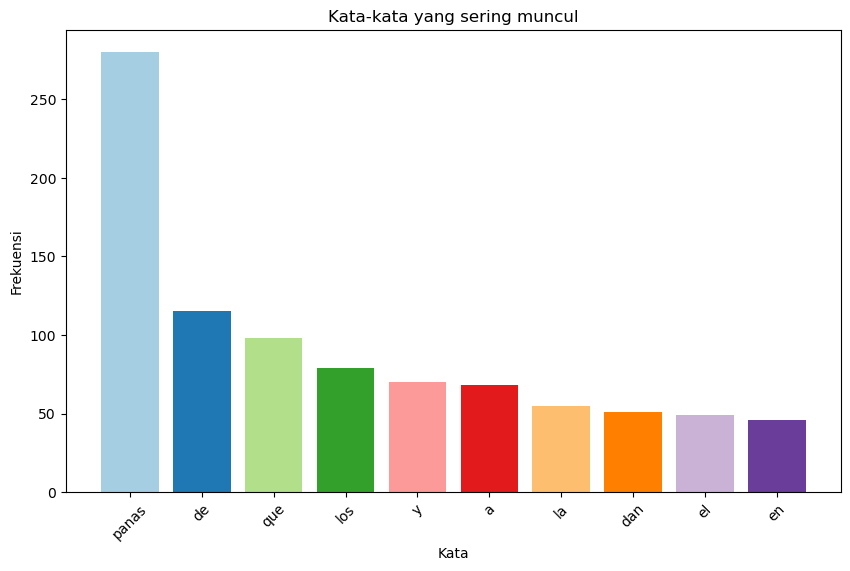

In [67]:
text = ' '.join(data['full_text'])

tokens = text.split()
word_count =Counter(tokens)

top_words = word_count.most_common(10)
word,count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10,6))
bars = plt.bar(word,count,color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata yang sering muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars,count):
    plt.text(bar.get_x(), bar.get_width() / 2 - 0.1, num+1, str(num), fontsize=12, color='black', ha='center')
    # plt.text(bar.get_x(), bar.get_width() / 2 - 0.1, num+1, fontsize=12, color='black', ha='center')

plt.show()